In [164]:
#importando as bibliotecas

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np


In [123]:
#Carregando a base de dados
df = pd.read_csv("titanic.csv")

In [124]:
#Visualizando as 5 primeiras linhas

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
#retornando o total de linhas e colunas
df.shape

(891, 12)

In [126]:
#retornando os tipos das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
#Convertendo o tipo de dado da coluna
df["Sex"]= df["Sex"].astype("category")

In [ ]:
#Retornando mulheres maiores de idade
df[(df["Sex"]=="female") & (df["Age"] >= 18)]

In [187]:
#Exibindo menor idade do DataFrame
df["Age"].min()

np.float64(0.42)

In [130]:

mulheres= df.loc[df.Sex == "female"]["Survived"]
mulheres

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [131]:
#percentual de sobreviventes entre as mulheres
round(sum(mulheres)/len(mulheres), 2)

0.74

In [132]:
homens = df.loc[df.Sex == "male"]["Survived"]
homens

0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64

In [133]:
#Percentual de sobreviventes entre os homens
round(sum(homens)/len(homens), 2)

0.19

In [ ]:
homem = df.loc[df["Sex"] == "male"] #filtrar homens
mulher = df.loc[df["Sex"]== "female"] #filtrar mulheres
total = df.loc[df["Survived"] == 1] #filtrar total de sobreviventes
total

In [135]:
#Percentual dos sobreviventes homens
homens_sobrevive = round(homens.sum()/len(total),2)
homens_sobrevive

np.float64(0.32)

In [136]:
#Percentual dos sobreviventes mulheres
mulheres_sobrevive = round(mulheres.sum()/len(total),2)
mulheres_sobrevive

np.float64(0.68)

In [137]:

#Criando um gráfico de pizza (pie chart) com um buraco no meio (donut chart)
#que mostra a distribuição de sexos do DataFrame 
fig = px.pie(df, names="Sex", hole=0.8, color_discrete_sequence=["blue", "orange"])
fig.show()

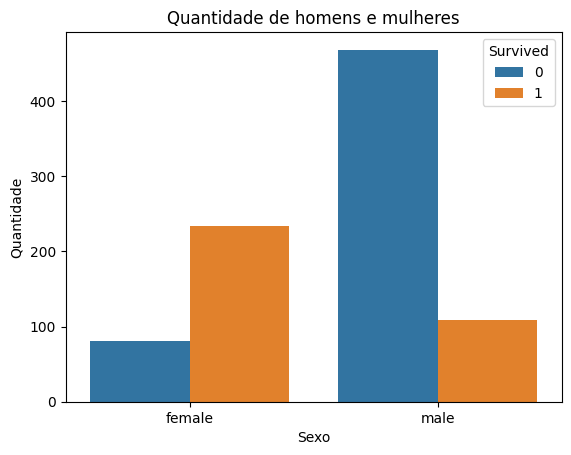

In [138]:
#Criação de gráfico de barras que mostra a contagem de 
#homens e mulheres em relação à sobrevivência
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Quantidade de homens e mulheres")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.show() 

Text(0.5, 1.0, 'Distribuição das Idades')

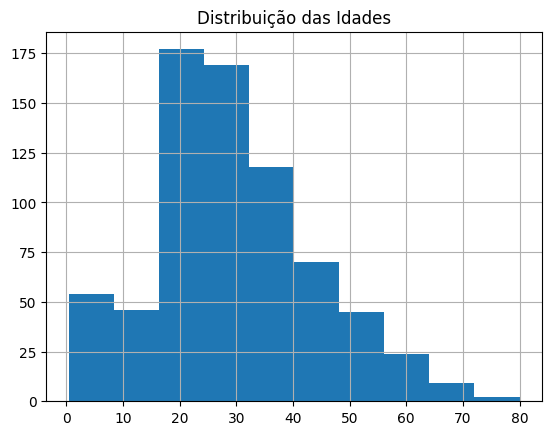

In [139]:
#distribuição da idade 

df["Age"].hist()
plt.title("Distribuição das Idades")

In [140]:
fig = px.box(df, y="Age") 
#Destacando os outliers atraves do grafico de caixa (box plot)
fig.show()

In [141]:
df.corr(numeric_only=True) #exibindo correlações

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

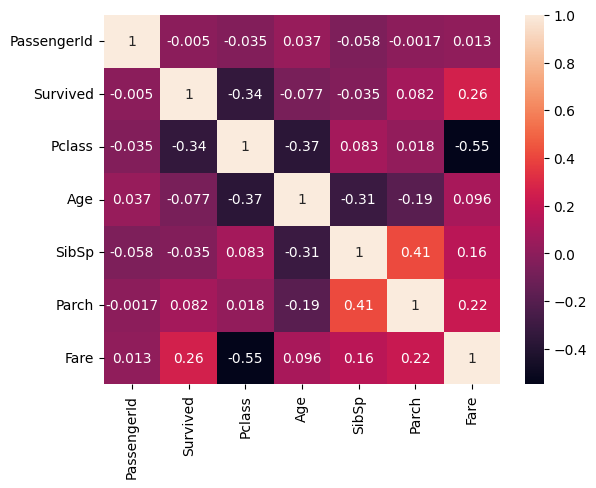

In [142]:
#Criando um mapa de calor (heatmap) que visualiza a 
#correlação entre as variáveis numéricas de um DataFrame 
sns.heatmap(df.corr(numeric_only=True), annot=True)

#**Pré Processamento

In [143]:
df["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: category
Categories (2, object): ['female', 'male']

In [144]:
#Criando uma copia do DataFrame
dados = df.copy()

In [145]:
dados.head(2) #exibindo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [146]:
#transformando os valores da coluna Sex
dados["Sex"] = dados["Sex"].map({"male":0, "female":1}) 

In [147]:
dados.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


In [148]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
dados.describe()
 #estatisticas descritivas de todas as colunas numericas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [150]:
dados["Age"] = dados["Age"].fillna(dados["Age"].median())
 #Preenchendo as idades nulas com as medianas

In [151]:
dados.isnull().sum() #Verificando

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
dados.columns  #verificando as features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [153]:
#Selecionando features para o modelo. No caso estamos retirando as 
#colunas que entendemos nao influenciar no resultado desejado
x = dados.drop(columns=["PassengerId", "Survived", "Name", "Ticket", "Cabin",
                         "Embarked"])
y = dados["Survived"]

In [154]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [155]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [156]:
#dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [157]:
x_train.shape, x_test.shape #exibindo

((712, 6), (179, 6))

In [158]:
#instanciando o modelo
random_forest = RandomForestClassifier()


In [159]:
random_forest.fit(x_train, y_train) #Treinando o modelo RandomForest

RandomForestClassifier()

In [160]:
resultado = random_forest.predict(x_test) #usando o .predict para fazer previsão com o modelo RandomForest

In [163]:
print(metrics.classification_report(y_test, resultado)) #imprimir um relatorio de classificação

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [180]:
teste = np.array([[2, 0, 32, 1, 0, 8.0500]]) #criando array para testar

In [182]:
random_forest.predict(teste)#executando: resultado retorna se o passageiro sobreviveria ou não

c:\Users\andre\OneDrive\Área de Trabalho\Imersão  Py Dados F3loc\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])